# This is a Housing price dataset from Kaggle competition
### We need to predict the sale price of the houses based on the given no. of features
- Here first we'll apply feature engineering techniques to develope a structured and informative dataset.
- Then we'll apply some regression algorithms to find the best fit to the dataset.

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('train.csv', index_col=0)

In [3]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#rows and columns
data.shape

(1460, 80)

In [5]:
#checking the null values
data.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [6]:
#creating a subset dataframe to see the null values of the hidden features
col = pd.DataFrame(data.iloc[ :,26:70])

In [7]:
col.isnull().sum()

ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Functional         0
Fireplaces         0
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageCars         0
GarageArea         0
GarageQual        81
GarageCond        81
PavedDrive         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
dtype: int64

In [8]:
#removing columns with mostly null values
data.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], 1, inplace=True)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [9]:
#shape of data
data.shape

(1460, 76)

 ### We'll break the feature analysis into steps with the columns
### Step 1
- MSZoning 

In [10]:
#total no. of values of different zoning areas
data.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [11]:
#using dictionary to categorize the values
zoning = {"MSZoning" :{"RL":1, "RM":2, "FV":3, "RH":4, "C (all)":4}}

In [12]:
data.replace(zoning, inplace=True)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,1,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,1,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,1,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,1,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,1,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [13]:
#data type changed to numeric
data.MSZoning.dtype

dtype('int64')

### Step 2
- Street

In [14]:
data.Street.value_counts(dropna=False)

Pave    1454
Grvl       6
Name: Street, dtype: int64

- Grvl values are way much less to make it considerable against pavel-
- On this , we can make an assumption that the whole feature has only the pavel street
- So this won't make a difference to the Sale price
- Hence we can drop this street feature

In [15]:
data.drop(['Street'], 1, inplace=True)

### Step 3 

- Lot Shape


In [16]:
data.LotShape.value_counts(dropna=False)

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [17]:
lot = {"LotShape" : {"Reg":1, "IR1":2, "IR3":3, "IR2":3}}

In [18]:
data.replace(lot, inplace=True)

In [19]:
# The datatype has now changed to int
data.LotShape.dtype

dtype('int64')

### Step 4
- Land Contour

In [20]:
data.LandContour.value_counts(dropna=False)

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

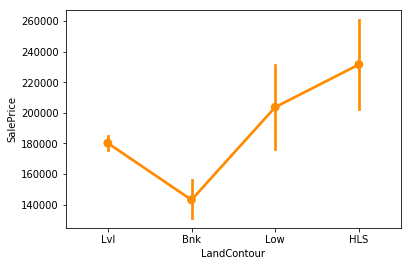

In [21]:
sns.pointplot(x="LandContour", y="SalePrice", data=data, color='darkorange')

- We cannot properly account for all the values for the Level parameter
- Let's draw another plot to accquire more information

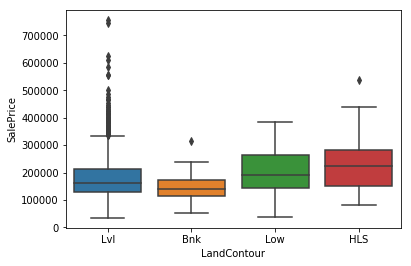

In [22]:
sns.boxplot(x="LandContour", y="SalePrice", data=data)

- Here we can configure that the level parametre varies along with the Sale price 
- Bank parameter has a low mean value as compared to the Low and HLS parameters
- But somehow , we still didn't get a clear relationship, let's now make a scatter plot

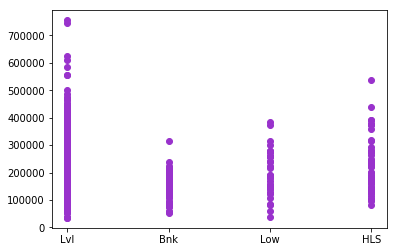

In [23]:
plt.scatter(data.LandContour, data.SalePrice, color='darkorchid')

- We see that Level value is more related to sale price as compared to others
- However we convert these value into numeric ones

In [24]:
contour = {"LandContour" : {"Lvl":1, "Bnk":3, "Low":2, "HLS":2}}

In [25]:
data.replace(contour, inplace=True)

In [26]:
# The datatype has now changed to int
data.LandContour.dtype

dtype('int64')

### Step 5
- LotFrontage and LotArea
- Let's consider LotFrontage and LotArea features along with their effects on the Sale Prices

In [27]:
#let's check if it contains any null values 
data.LotFrontage.isnull().sum()

259

In [28]:
#we are now filling the null values with the median value
data.LotFrontage.fillna(data.LotFrontage.median(), inplace=True)

In [29]:
#Let's verify
data.LotFrontage.isnull().sum()

0

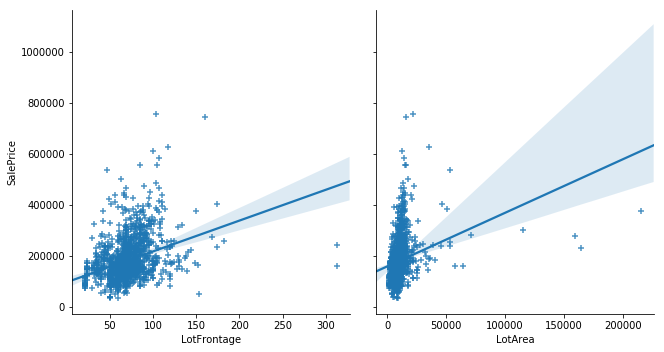

In [30]:
sns.pairplot(data, x_vars=['LotFrontage', 'LotArea'], y_vars='SalePrice', size =5, aspect=.9, markers="+", kind='reg')

- We can determine that the LotFrontage is somehow related to the Sale Price , as the plot determines the standing linearity between both of them

- However Lot Area doesn't affect sales due to high varaince in the linear fit to make it considerable as the Sale Price are mostly constant with a very acute range of the LotArea

- Then it's ideal to drop the LotArea feature from the dataset

In [31]:
data.drop(['LotArea'], 1, inplace=True)

In [32]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,1,65.0,1,1,AllPub,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,1,80.0,1,1,AllPub,FR2,Gtl,Veenker,Feedr,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,1,68.0,2,1,AllPub,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,1,60.0,2,1,AllPub,Corner,Gtl,Crawfor,Norm,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,1,84.0,2,1,AllPub,FR2,Gtl,NoRidge,Norm,...,0,0,0,0,0,12,2008,WD,Normal,250000


### Step 6
- Utilities

In [33]:
data.Utilities.value_counts(dropna=False)

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

- The utilities are majorly ALL Pub except one , so this feature hardly makes effect on the Sales price
- So we'll drop this feature

In [34]:
data.drop(['Utilities'], 1, inplace=True)

### Step 7 
- Lot Configuration

In [35]:
data.LotConfig.value_counts(dropna=False)

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

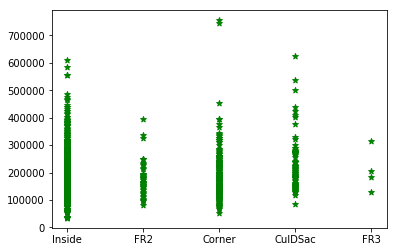

In [36]:
#let's make a scatter plot for more significance
plt.scatter(data.LotConfig, data.SalePrice, marker='*', color='g')

- Here we can categorize FR2 and FR3 together 

In [37]:
#Let make it numeric
config = {"LotConfig" : {"Inside":1, "Corner":2, "CulDSac":3, "FR2":4, "FR3":4}}

In [38]:
data.replace(config, inplace=True)

In [39]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,1,65.0,1,1,1,Gtl,CollgCr,Norm,Norm,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,1,80.0,1,1,4,Gtl,Veenker,Feedr,Norm,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,1,68.0,2,1,1,Gtl,CollgCr,Norm,Norm,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,1,60.0,2,1,2,Gtl,Crawfor,Norm,Norm,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,1,84.0,2,1,4,Gtl,NoRidge,Norm,Norm,...,0,0,0,0,0,12,2008,WD,Normal,250000


### Step 8
- Land Slope

In [40]:
data.LandSlope.value_counts(dropna=False)

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

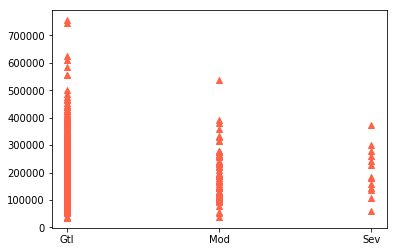

In [41]:
plt.scatter(data.LandSlope, data.SalePrice, marker='^', color='tomato')

- Here we cannot merge Moderte and Severe slope as they both affect prices individually with significance

In [42]:
slope = {"LandSlope" : {"Gtl":1, "Mod":2, "Sev":3}}

In [43]:
data.replace(slope, inplace=True)

In [44]:
data.LandSlope.dtype

dtype('int64')

### Step 9
- Neighbourhood

In [45]:
data.Neighborhood.value_counts(dropna=False)

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [46]:
#This enlarges the plot so that we can distinguish between various parametres
sns.set(rc={'figure.figsize':(15,8.27)})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

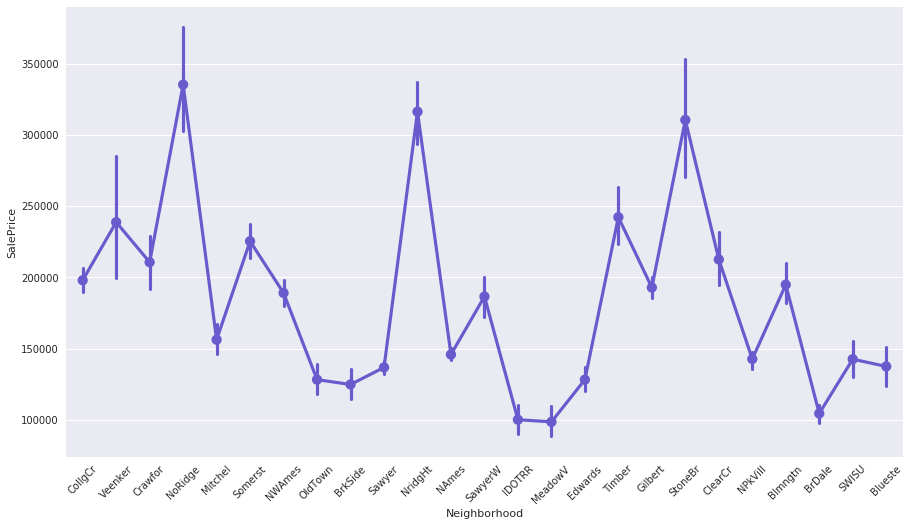

In [47]:
#This is a point plot 
sns.pointplot(x="Neighborhood", y="SalePrice", data=data, color='slateblue')
plt.xticks(rotation=45)

- Noridge , NridgHt, StoneBr contributes to the high sales price 
- while parameteres with low value counts tends to be less effective towards sale prices

- **Hence we categorise according to the analysis made**

In [48]:
neigh = {"Neighborhood" : {"NoRidge":1, "NridgHt":1, "StoneBr":1, "NAmes":2, "CollgCr":2,
                           "OldTown":2, "Edwards":2 , "Somerst":3, "Gilbert":3, "NWAmes":3,
                           "SawyerW":3, "Crawfor":3, "Veenker":3, "Timber":3, "ClearCr":3, 
                           "Blmngtn":3, "Blueste":4, "SWISU":4, "BrDale":4, "NPkVill":4, 
                           "MeadowV":4, "IDOTRR":4, "Sawyer":4, "BrkSide":4, "Mitchel":3,}}

In [49]:
data.replace(neigh, inplace=True)

In [50]:
#Hence we succesfully categorize all the values based on their value counts and affect on the saleprice
data.Neighborhood.dtype

dtype('int64')

### Step 10
- Here we have two features regarding the conditons and both constituing commom parameters
- condition-2 is applied when more than one paramtere values is available
- Let's do some operations and find out if we can drop any of the two columns 

In [51]:
data.Condition1.value_counts(dropna=False)

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [52]:
data.Condition2.value_counts()

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
RRAn         1
PosA         1
RRAe         1
Name: Condition2, dtype: int64

- **We can see that Contion1 feature has given considerable data where else Condtion2 mostly has Norm as the value**
- **Hence we'll drop the Condtion2 feature from the dataset**

In [53]:
data.drop(['Condition2'], 1, inplace=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

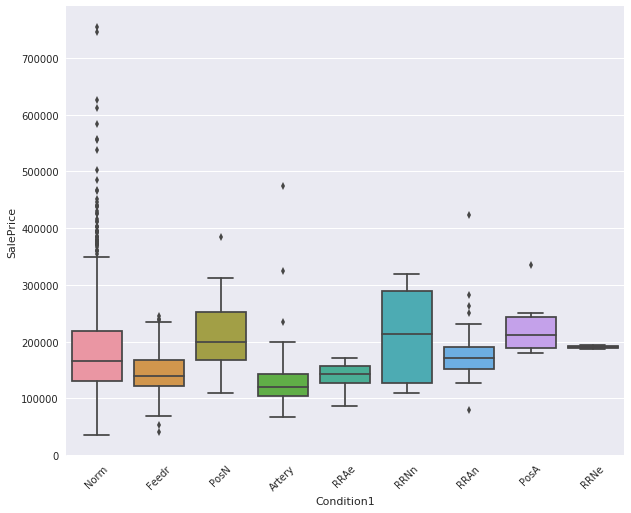

In [54]:
sns.set(rc={'figure.figsize':(10,8.27)})
sns.boxplot(x="Condition1", y="SalePrice", data=data)
plt.xticks(rotation=45)

- Norm and RRAn has comparingly similar range mean along with Feedr, RRAe and Artery paramters
- Rest we can all compile into the other category

In [55]:
cond = {"Condition1" : {"Norm":1, "RRAn":1, "Feedr":2, "Artery":2, "RRAe":2,
                       "RRNn":3, "PosN":3, "PosA":3, "RRNe":3 }}

In [56]:
data.replace(cond, inplace=True)

In [57]:
data.Condition1.dtype

dtype('int64')

In [58]:
data.shape

(1460, 72)

### Step 11
- BldgType

In [59]:
data.BldgType.value_counts(dropna=False)

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

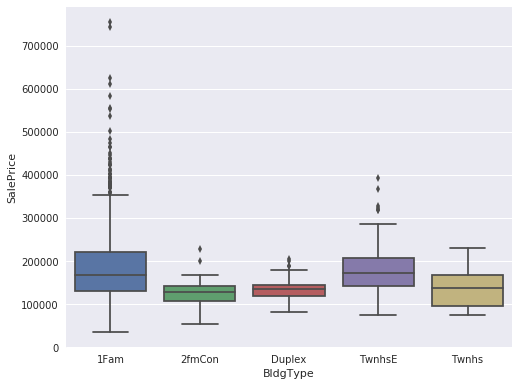

In [60]:
sns.set(rc={'figure.figsize':(8,6.27)})
sns.boxplot(data.BldgType, data.SalePrice)

- 2fmCon and Duplex does not differ much as their valuecounts contains less difference
- Twnhs cannot combine with 1Fam as 1Fam contains many outliers corresponding to the sale price
- This may result into underfitting , so we must prevent it

In [61]:
bltype = {"BldgType" : {"1Fam":1, "TwnhsE":2, "2fmCon":3, "Duplex":3, "Twnhs":3}}

In [62]:
data.replace(bltype, inplace=True)

In [63]:
#Feature converted to numeric
data.BldgType.dtypes

dtype('int64')

### Step 12 
- House Style

In [64]:
data.HouseStyle.value_counts(dropna=False)

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

- **Seeing the value count results, we didn't get the clear decison between multiple parameters**
- **Hence we will make a count plot to see if the categrical values vary considerably**

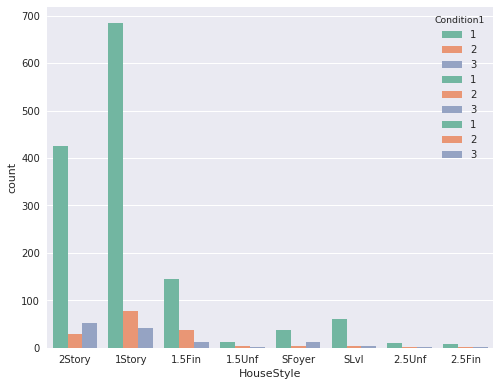

In [65]:
sns.countplot(x='HouseStyle', data=data, palette='Set2', hue='LandSlope')
sns.countplot(x='HouseStyle', data=data, palette='Set2', hue='BldgType')
sns.countplot(x='HouseStyle', data=data, palette='Set2', hue='Condition1')


- Here we are taking House Style along with the other features like LansScope, Bldgtype, Condtion1
- In all we can see that we have major values belonging to class 1

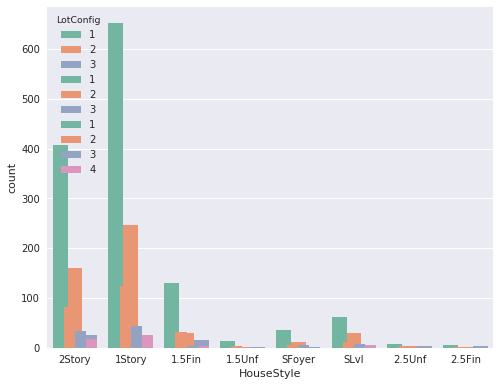

In [66]:
sns.countplot(x='HouseStyle', data=data, palette='Set2', hue='LandContour')
sns.countplot(x='HouseStyle', data=data, palette='Set2', hue='LotShape')
sns.countplot(x='HouseStyle', data=data, palette='Set2', hue='LotConfig')

- Again we have taken House Style along with the other features like LansScope, Bldgtype, Condtion1
- Here also we can see that we have major values belonging to class 1

**Summing up the plot results, it's better to drop the house style as it won't make much of a difference**

In [67]:
data.drop(['HouseStyle'], 1, inplace=True)

In [68]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,1,65.0,1,1,1,1,2,1,1,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,1,80.0,1,1,4,1,3,2,1,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,1,68.0,2,1,1,1,2,1,1,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,1,60.0,2,1,2,1,3,1,1,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,1,84.0,2,1,4,1,1,1,1,...,0,0,0,0,0,12,2008,WD,Normal,250000


### Step 13
- Next we have Overall quality and condition of the house
- These both features contains the same paramteres
- So, let's analyze both of them according to their significance

In [69]:
data.OverallQual.value_counts(dropna=False)

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [70]:
data.OverallCond.value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

- **There's is a scale of 10 to determine the quality and the condition**
- **So if we classify the features into two categories i:e "Good(5 or above)" and "Bad(below 5)", we configure that the overall condtion has mostly good values**
- **Where else the quality has more distributed values, so we'll take quality feature into account while dropping the condition feature**

- Let's have a graphical look over the Overall quality in accordance to their value counts

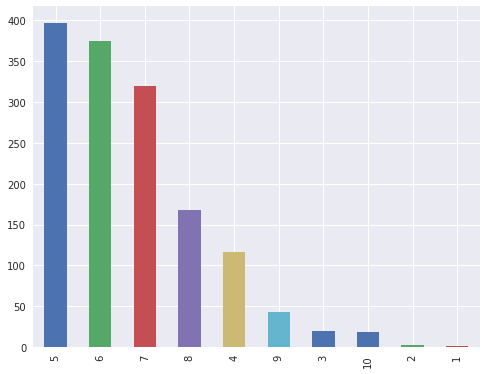

In [71]:
data.OverallQual.value_counts().plot(kind='bar')

- The starting values has a major count as compared to the succeding ones

In [72]:
#we will drop the Overall Condition feature
data.drop(['OverallCond'], 1, inplace=True)

### Step 14
- Year of built gives us the construction date of the house and thus it doesn't seem to be much affecting the price of the house
- Same as Year Remodel date feature , it's also not of  much significance to our target variable
- So we drop both of the features

In [73]:
data.drop(['YearBuilt', 'YearRemodAdd'], 1 ,inplace=True)

### Step 15
- Roof Style

In [74]:
data.RoofStyle.value_counts(dropna=False)

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

- Violin plot can be considered as the extension of the box plot for more interpretation of the distributions

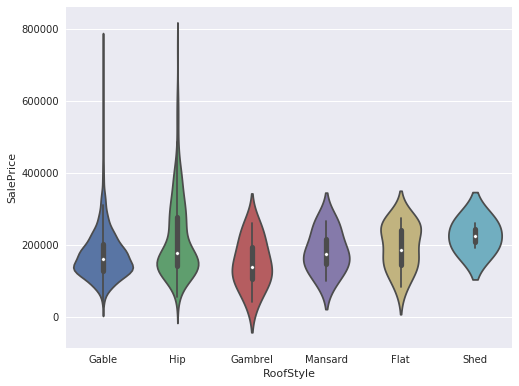

In [75]:
sns.violinplot(data.RoofStyle, data.SalePrice)

- The value count can be interpreted as Gable as widely more values as comapared to others
- The Hip has slight better distribution(skewed) than the Gable across the sale price
- The median value of Hip is comaparabe to that of the Mansard and Flat

In [76]:
# categorizing the feature
roof = {"RoofStyle" : {"Gable":1, "Hip":2, "Mansard":2, "Flat":2, "Gambrel":3, "Shed":3}}

In [77]:
data.replace(roof, inplace=True)

In [78]:
#converted to numeric
data.RoofStyle.dtype

dtype('int64')

### Step 16
- Roof Material

In [79]:
data.RoofMatl.value_counts(dropna=False)

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Roll          1
Metal         1
Membran       1
ClyTile       1
Name: RoofMatl, dtype: int64

- **Clearly it is seen that there is not much variety of value counts to affect the Sale Price**
- **The composite standard shingle is only the most preferable roof material used**

In [80]:
#dropping the roof material
data.drop(['RoofMatl'], 1, inplace=True)

### Step 17
- Here we have two features on the exterior of the house
- Let's look at both of them

In [81]:
data.Exterior1st.value_counts(dropna=False)

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
ImStucc      1
CBlock       1
AsphShn      1
Name: Exterior1st, dtype: int64

In [82]:
data.Exterior2nd.value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

- Clearly it's seen that there is not much of a difference between their value counts and the order
- So we can take only one feature to consider

In [83]:
data.drop(['Exterior2nd'], 1, inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

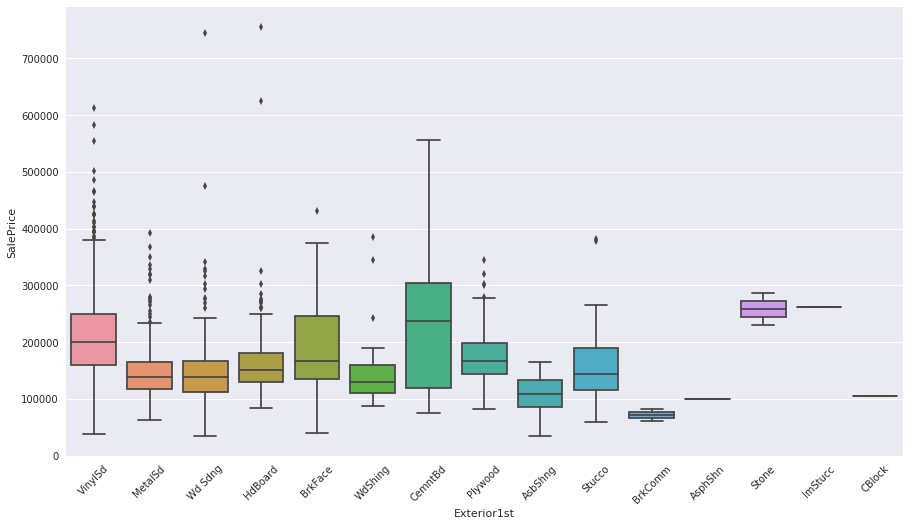

In [84]:
sns.set(rc={'figure.figsize':(15,8.27)})
sns.boxplot(data.Exterior1st, data.SalePrice)
plt.xticks(rotation=45)

- Here we have many parametres of the exterior used in the house
- Boxplot illustrates on the various distributions and their mean positions 
- Hence having in account of the values counts , we'll also consider the mean postions, length of distributions, no.of outliers

In [85]:
ext = {"Exterior1st" : {"VinylSd":1, "BrkFace":1, "MetalSd":2, "HdBoard":2, "Wd Sdng":2,
                        "Plywood":2, "Stucco":2, "WdShing":3, "AsbShng":3, "AsphShn":3,
                        "CBlock":3, "BrkComm":3, "CemntBd":4, "Stone":4, "ImStucc":4}}

In [86]:
data.replace(ext, inplace=True)

In [87]:
#transformed to numeric
data.Exterior1st.dtype

dtype('int64')

### Step 18
- Masonary Vineer Type

In [88]:
#dropna also shows the value count of the null values (if any)
data.MasVnrType.value_counts(dropna=False)

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

- Here there are lot of none values which means that there is no value or else a null value
- so we first convert the none values into null

In [89]:
#replacing none values
data.MasVnrType.replace('None', 'Stone', inplace=True)

In [90]:
#let's test it
data.MasVnrType.value_counts(dropna=False)

Stone      992
BrkFace    445
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

In [91]:
data.MasVnrType.isnull().sum()

8

In [92]:
data['MasVnrType'].fillna('Stone', inplace=True)

In [93]:
data.MasVnrType.isnull().sum()

0

In [94]:
#Now we just categorize the parameteres
mas = {"MasVnrType" : {"Stone":1, "BrkFace":2, "BrkCmn":2}}
data.replace(mas, inplace=True)

In [95]:
data.MasVnrType.dtypes

dtype('int64')

### Step 19
- Masonary venner area
- As this is a regressive feature , we analyze it by plotting against the Sale Price to see it's affect

In [96]:
data.MasVnrArea.isnull().sum()

8

In [97]:
data['MasVnrArea'].fillna(data['MasVnrArea'].median(), inplace=True)

In [98]:
data.MasVnrArea.isnull().sum()

0

/home/netzwelt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/netzwelt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


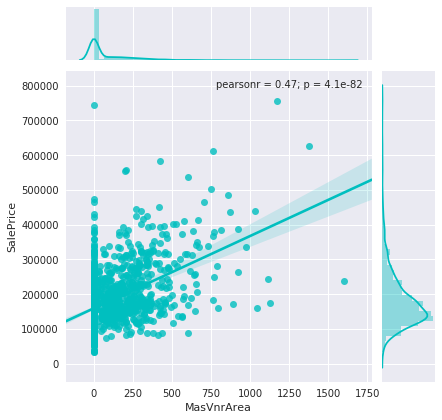

In [99]:
#kind paramter fits a regression line to the data to exhibit the linear relationship
sns.jointplot(x = 'MasVnrArea', y = 'SalePrice', data=data, color='c', kind='reg')

### Step 20
- Exterior quality 
- Exterior Condition

In [100]:
data.ExterQual.value_counts(dropna=False)

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

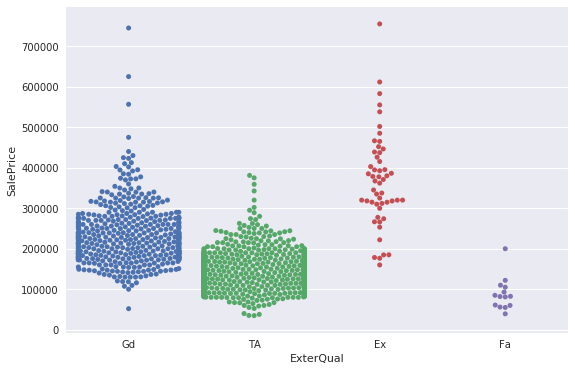

In [101]:
sns.set(rc={'figure.figsize':(9,6)})
sns.swarmplot(data.ExterQual, data.SalePrice, dodge=True)

- Looking at this we can infer that only the Good and Average quality is wide spread along with skewed Excellent
- Fair is very small to consider and however we can drop this by combining the first two parameters by the could a large risk to take
- Hence we avoid that

In [102]:
qual = {"ExterQual" :{"Gd":2, "Ex":2, "TA":1, "Fa":1}}

In [103]:
data.replace(qual, inplace=True)

In [104]:
#feature grouped to numerical values
data.ExterQual.dtype

dtype('int64')

- Now let's look upto the external condition

In [105]:
data.ExterCond.value_counts(dropna=False)

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

*Here is not much of a diiference to consider between the different values besides we have categorize the quality feature*<br>
*Hence there is no significant need to include this feature ,so we can drop it*

In [106]:
data.drop(['ExterCond'], 1, inplace=True)

### Step 21
- Foundation

In [107]:
data.Foundation.value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

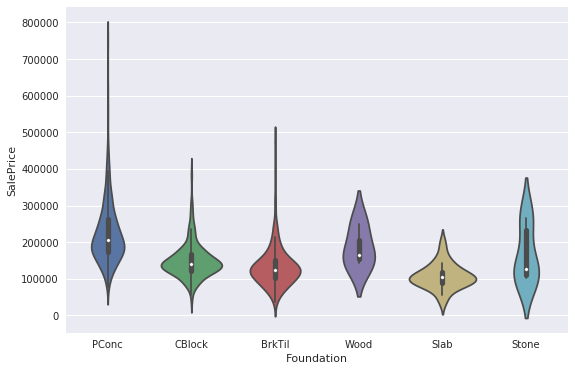

In [108]:
sns.set(rc={'figure.figsize':(9,6)})
sns.violinplot(data.Foundation, data.SalePrice)

*PConc has most no. of outliers depicted by the high stretched line*<br>*CBlock has a wide block of concentrated points than BrkTil and less skewed*

In [109]:
found = {"Foundation" : {"PConc":1, "Wood":1, "CBlock":2, "Slab":2, "BrkTil":3, "Stone":3 }}

In [110]:
data.replace(found, inplace=True)

In [111]:
data.Foundation.dtype

dtype('int64')

### Step 22
- Basement Quality
- Basement Conditon
- Basement Exposure
- Basement Finished Area Rating type 1
- Basement Finished Area Rating type 2

In [112]:
data.BsmtQual.value_counts(dropna=False)

TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int64

In [113]:
data.BsmtQual.fillna('Gd', inplace=True)

In [114]:
data.BsmtQual.isnull().sum()

0

In [115]:
data.BsmtQual.unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

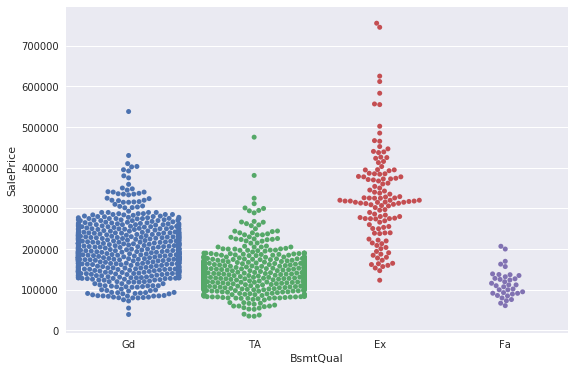

In [116]:
sns.swarmplot(data.BsmtQual, data.SalePrice)

- Here there is not much similarity found to combine the categories , so we differentiate each quality into a different category

In [117]:
base = {"BsmtQual" : {"Gd":1, "TA":2, "Ex":3, "Fa":2}}

In [118]:
data.replace(base, inplace=True)

In [119]:
data.BsmtQual.dtype

dtype('int64')

- BsmtCond

In [120]:
data.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

- Explaining the conditions won't affect too much as there is only one major value i:e Average
- Also at first we have defined the quality of the basement, so there is no explicit need of defining this feature

In [121]:
#dropping BsmtCond
data.drop(['BsmtCond'], 1, inplace=True)

- BsmtExposure

In [122]:
data.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

- *0.0 depicts the null values and combining with the no exposure values , this constitutes approximately 1000 values*<br>
- *Thus most of the values have no exposure of the basement and thus won't contribute to the Sale Prices*

In [123]:
#dropping BsmtExposure
data.drop(['BsmtExposure'], 1, inplace=True)

In [124]:
#As we know 0.0 constitute null values so, we replace it by nan
data.replace(0.0, np.nan, inplace=True)

- BsmtFinType1

In [125]:
data.BsmtFinType1.value_counts(dropna=False)

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NaN     37
Name: BsmtFinType1, dtype: int64

In [126]:
#filling up the null values
data.BsmtFinType1.replace(np.nan, "Unf", inplace=True)

In [127]:
data.BsmtFinType1.value_counts(dropna=False)

Unf    467
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

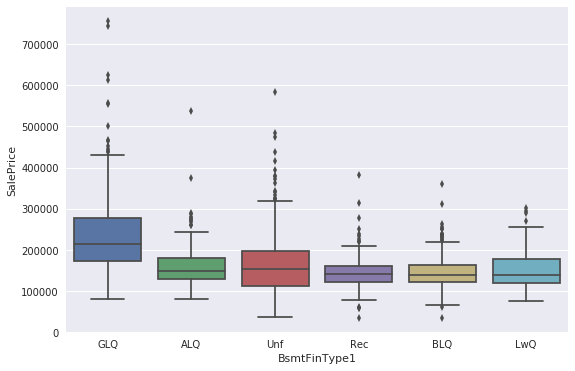

In [128]:
sns.boxplot(data.BsmtFinType1, data.SalePrice)

- Glq has the longest distribution over sale price with some outliers also, it's mean is also high as compared to others , so we'll provide it a seperate category also considering it's value counts
- Unf determine unfinished basement while all remaining values have a similar plots 

In [129]:
fin1 = {"BsmtFinType1" : {"GLQ":1, "Unf":2, "ALQ":3, "Rec":3, "BLQ":3, "LwQ":3}}

In [130]:
data.replace(fin1, inplace=True)

In [131]:
data.BsmtFinType1.dtype

dtype('int64')

- BsmtFinType2

In [132]:
data.BsmtFinType2.value_counts(dropna=False)

Unf    1256
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

- Clearly we can see that most of the basement are unfinshed and if we sum it up with the null values it approaches 1300 
- So, we won't have this feature in further consideration

In [133]:
data.drop(['BsmtFinType2'], 1, inplace=True)

### Step 23
- Basement Finished Area Square feet type1
- Basement Finished Area Square feet type2
- Unfinished square feet area
- Total square feet basement area

**At First we check any null values ,if present we replace them accordingly**

In [134]:
print(data.BsmtFinSF1.isnull().sum())
print(data.BsmtFinSF2.isnull().sum())
print(data.BsmtUnfSF.isnull().sum())
print(data.TotalBsmtSF.isnull().sum())

467
1293
118
37


In [135]:
#removing BsmtFinSF2 as it has mostly null values 
data.drop(['BsmtFinSF2'], 1, inplace=True)

In [136]:
# filling the null values with the median values of each column
data.BsmtFinSF1.fillna(data.BsmtFinSF1.median(), inplace=True)

In [137]:
data.BsmtUnfSF.fillna(data.BsmtUnfSF.median(), inplace=True)

In [138]:
data.TotalBsmtSF.fillna(data.TotalBsmtSF.median(), inplace=True)

In [139]:
data.TotalBsmtSF.isnull().sum()

0

    Now we'll use the pair plot to see the relationship between these 3 features along with the SalePrice

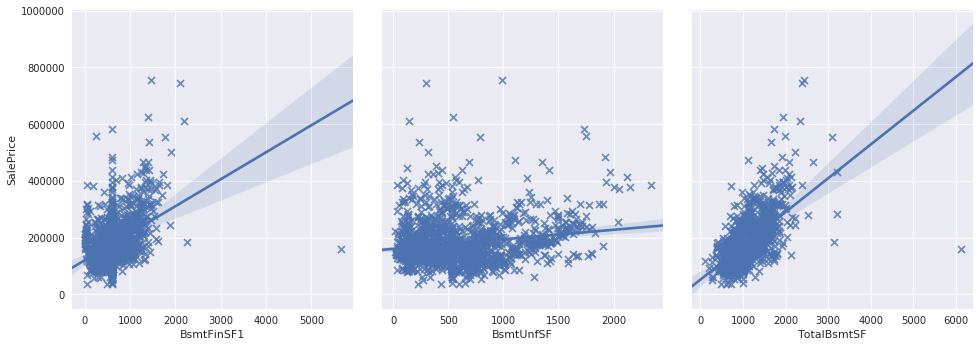

In [140]:
sns.pairplot(data=data, x_vars=['BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF'],
             y_vars=['SalePrice'], size=5, markers='x', aspect=.9, kind='reg')

- Both feature one and third depicts the linear relationship along with sale price however 3rd has more linearity than the first but we'll keep both of them
- Feature 2 doesn't produce much affect on prices and have a poor  linaer fit to the data, so we'll drop it

In [141]:
data.drop(['BsmtUnfSF'], 1, inplace=True)

### Step 24
- Heating type
- HeatingQC: Heating quality and condition

In [142]:
data.Heating.value_counts(dropna=False)

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

- Heating has large no. of values of GasA and the other values are very small compared to that of GasA
- So, there won't be much of a difference by removing this feature

In [143]:
data.drop(['Heating'], 1, inplace=True)

- HeatingQC

In [144]:
data.HeatingQC.value_counts(dropna=False)

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

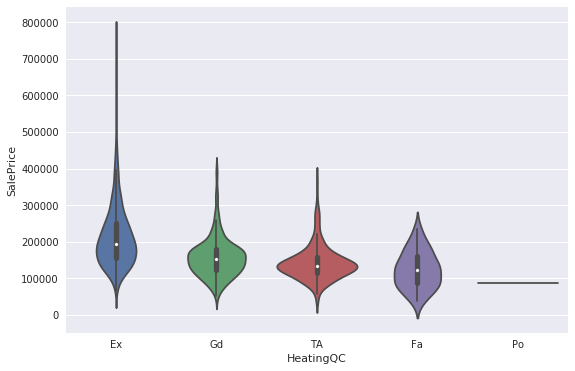

In [145]:
sns.violinplot(data.HeatingQC, data.SalePrice)

- The strecthed line in Ex shows there are many outliers and also the points are more distributed over it's length
- Gd and TA has more of their points concentrated to lower prices and have some outliers also
- Fa has no outliers and Po has only one value as depicted by a single horizontal line

In [146]:
heat = {"HeatingQC" : {"Ex":1, "Gd":2, "TA":2, "Fa":3, "Po":3}}

In [147]:
data.replace(heat, inplace=True)

In [148]:
data.HeatingQC.dtype

dtype('int64')

### Step 25
- CentralAir: Central air conditioning
- Electrical System

In [149]:
data.CentralAir.value_counts(dropna=False)

Y    1365
N      95
Name: CentralAir, dtype: int64

** Most house has central air conditoning so, this feature won't make much of a difference**

In [150]:
data.drop(['CentralAir'], 1, inplace=True)

- Electrical System

In [151]:
data.Electrical.value_counts(dropna=False)

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64

**Similar the case with Electical as the most houses has the standard type and the other values are too less to consider**

In [152]:
data.drop(['Electrical'], 1, inplace=True)

### Step 26 
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- GrLivArea: Above grade (ground) living area square feet
- LowQualFinSF: Low quality finished square feet (all floors)

In [153]:
#checking for null values
print(data['1stFlrSF'].isnull().sum())
print(data['2ndFlrSF'].isnull().sum())
print(data['GrLivArea'].isnull().sum())
print(data['LowQualFinSF'].isnull().sum())

0
829
0
1434


In [154]:
#removing the LowQualFinSF
data.drop(['LowQualFinSF'], 1, inplace=True)

In [155]:
#filling null in 2nd floor area
data['2ndFlrSF'].fillna(data['2ndFlrSF'].mean(), inplace=True)

*Examine these features with a pair plot*

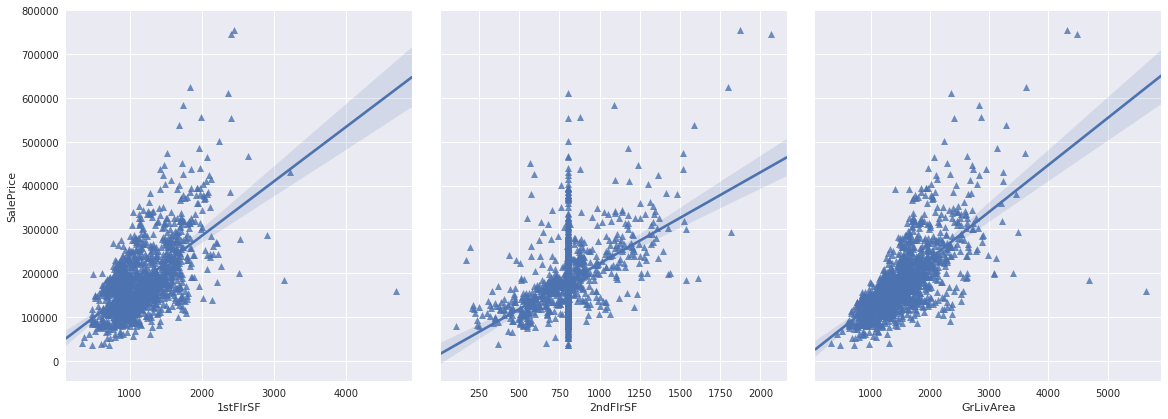

In [156]:
sns.pairplot(data, x_vars=['1stFlrSF', '2ndFlrSF', 'GrLivArea'], y_vars=['SalePrice'],
             markers = '^', kind='reg', size=6, aspect=.9)

- 1st and 3rd show the good linear fit to the data while 3rd has low variance comapared to that of 1st
- 2nd has data sparsity and also we had filled it's null values with the median value, it's also shows linearity which we can't ignore 
- Thus we keep all 3 of them

### Step 27
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

In [157]:
#checking for null values
print(data.BsmtFullBath.isnull().sum())
print(data.BsmtHalfBath.isnull().sum())
print(data.FullBath.isnull().sum())
print(data.HalfBath.isnull().sum())
print(data.BedroomAbvGr.isnull().sum())

856
1378
9
913
6


In [158]:
#removing BsmtHalfBath
data.drop(['BsmtHalfBath'], 1, inplace=True)

In [159]:
data.BsmtFullBath.value_counts(dropna=False)

NaN     856
 1.0    588
 2.0     15
 3.0      1
Name: BsmtFullBath, dtype: int64

In [160]:
#let's fill the na values with 1 which is the common no. of bathrooms in the value counts
data.BsmtFullBath.fillna(1.0, inplace=True)

In [161]:
data.BsmtFullBath.value_counts(dropna=False)

1.0    1444
2.0      15
3.0       1
Name: BsmtFullBath, dtype: int64

- Now the major no. of bathrooms are only 1 and while others are very less
- Now it's obvious that we remove this feature as we did previously

In [162]:
data.drop(['BsmtFullBath'], 1, inplace=True)

- FullBath

In [163]:
data.FullBath.value_counts(dropna=False)

 2.0    768
 1.0    650
 3.0     33
NaN       9
Name: FullBath, dtype: int64

In [164]:
# we replace the null values to the no.2 as it is has most values
data.FullBath.fillna(2, inplace=True)

In [165]:
data.FullBath.value_counts(dropna=False)

2.0    777
1.0    650
3.0     33
Name: FullBath, dtype: int64

- Half Bath

In [166]:
data.HalfBath.value_counts(dropna=False)

NaN     913
 1.0    535
 2.0     12
Name: HalfBath, dtype: int64

- It has also the similar situation like BsmtFullBath
- Hence we drop this feature also

In [167]:
data.drop(['HalfBath'], 1, inplace=True)

- BedroomAbvGr

In [168]:
data.BedroomAbvGr.value_counts(dropna=False)

 3.0    804
 2.0    358
 4.0    213
 1.0     50
 5.0     21
 6.0      7
NaN       6
 8.0      1
Name: BedroomAbvGr, dtype: int64

**As we can see there are many categorical values , so to reduce it we'll merge 2-3 categories**

In [169]:
data.BedroomAbvGr.replace([8, 6, np.nan], 5, inplace=True)

In [170]:
#let's check it 
data.BedroomAbvGr.value_counts(dropna=False)

3.0    804
2.0    358
4.0    213
1.0     50
5.0     35
Name: BedroomAbvGr, dtype: int64

### Step 28
- Kitchen: Kitchens above grade
- KitchenQual: Kitchen quality

In [171]:
data.KitchenAbvGr.value_counts(dropna=False)

 1.0    1392
 2.0      65
 3.0       2
NaN        1
Name: KitchenAbvGr, dtype: int64

**Based on the value counts, clearly we can drop this feature**

In [172]:
data.drop(['KitchenAbvGr'], 1, inplace=True)

- Kitchen Quality

In [173]:
data.KitchenQual.value_counts(dropna=False)

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

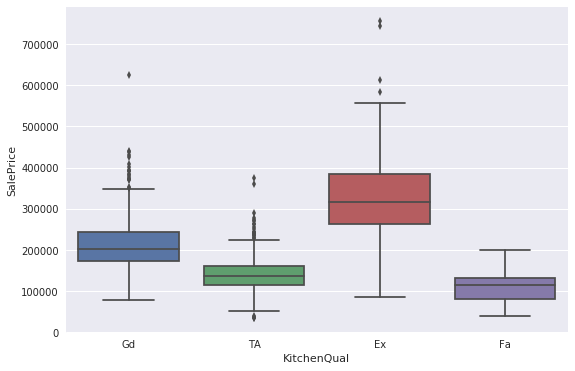

In [174]:
sns.boxplot( x=data.KitchenQual, y=data.SalePrice)

- The only similarity is seen between TA and Fa with their values distribution and mean value
- Ex and Gd are different in terms distribution and no. of outliers

In [175]:
kitchen = {"KitchenQual" : {"Ex":1, "Gd":2, "TA":3, "Fa":3}}

In [176]:
data.replace(kitchen, inplace=True)

In [177]:
#changed to numeric
data.KitchenQual.dtype

dtype('int64')

In [178]:
data.shape

(1460, 52)

### Step 29 
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality

In [179]:
data.TotRmsAbvGrd.value_counts(dropna=False)

6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64

In [180]:
#let's reduce the categorical values if can be done
data.replace([2, 3], 4, inplace=True)
data.replace([10, 11, 12, 14], 9, inplace=True)

In [181]:
data.TotRmsAbvGrd.value_counts(dropna=False)

6    402
7    329
5    275
8    187
9    152
4    115
Name: TotRmsAbvGrd, dtype: int64

- Functional: Home functionality

In [182]:
data.Functional.value_counts(dropna=False)

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

- Not much of a value diversity is seen , hence we'll remove this feature

In [183]:
data.drop(['Functional'], 1, inplace=True)

### Step 30
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality

In [184]:
data.Fireplaces.value_counts(dropna=False)

NaN     690
 1.0    650
 4.0    120
Name: Fireplaces, dtype: int64

- There is only 2 values apart from null and hence if we replace null by 1 value 
- then also there is not any significance the feature will carry
- Hence we'll drop this also

In [185]:
data.drop(['Fireplaces'], 1, inplace=True)

- FireplaceQu

In [186]:
data.FireplaceQu.value_counts(dropna=False)

NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

- Looks like that Gd has more clear distribution than TA across the Sale Prices
- But they both have outliers so, Fa will be a good choice to replace null values

In [187]:
data.FireplaceQu.fillna("Fa", inplace=True)

In [188]:
data.FireplaceQu.value_counts(dropna=False)

Fa    723
Gd    380
TA    313
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

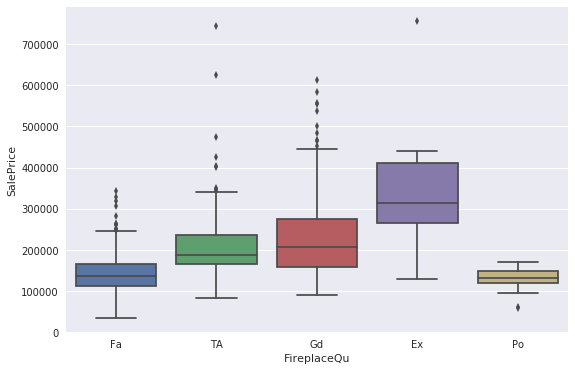

In [189]:
#let's have a look at the plot
sns.boxplot(data.FireplaceQu, data.SalePrice)

In [190]:
fire = {"FireplaceQu" : {"Ex":1, "Gd":2, "TA":2, "Fa":3, "Po":3}}

In [191]:
data.replace(fire, inplace=True)

In [192]:
data.FireplaceQu.dtype

dtype('int64')

### Step 31
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition

In [193]:
data.GarageType.value_counts(dropna=False)

Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [194]:
#replacing the null values
data.GarageType.fillna("Attchd", inplace=True)

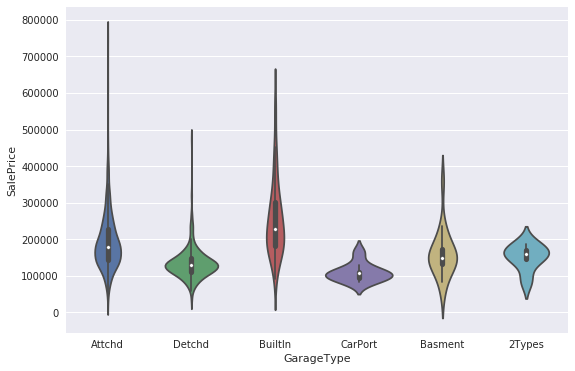

In [195]:
sns.violinplot(data.GarageType, data.SalePrice)

In [196]:
gtype = {"GarageType" : {"Attchd":1, "Detchd":2, "BuiltIn":3, "CarPort":4, "Basment":4, "2Types":4}}

In [197]:
data.replace(gtype, inplace=True)

In [198]:
data.GarageType.dtype

dtype('int64')

- Garage year bulit

In [199]:
# The year doesn't concern so much ,hence we can remove it
data.drop(['GarageYrBlt'], 1, inplace=True)

- Garage Finished

In [200]:
data.GarageFinish.value_counts(dropna=False)

Unf    605
RFn    422
Fin    352
NaN     81
Name: GarageFinish, dtype: int64

In [201]:
#unfinished and nan (no garage) provide the same meaning and hence can be replaced with that
data.GarageFinish.fillna("Unf", inplace=True)

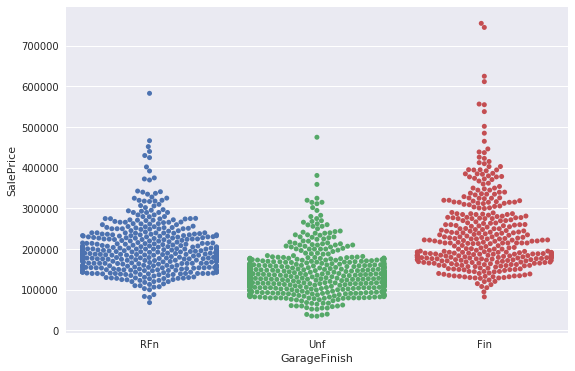

In [202]:
sns.swarmplot(data.GarageFinish, data.SalePrice)

In [203]:
finish = {"GarageFinish" : {"RFn":2, "Fin":1, "Unf":3}}

In [204]:
data.replace(finish, inplace=True)

In [205]:
data.GarageFinish.dtype

dtype('int64')

- Garage Cars

In [206]:
data.GarageCars.value_counts(dropna=False)

 4.0    1010
 1.0     369
NaN       81
Name: GarageCars, dtype: int64

- There are only two values 1 and 4 means either there are 4 cars or 1 cars, which is quite irrelevent
- Also the distribution becomes one sided if we replace null by 4
- Hence we'll drop it

In [207]:
data.drop(['GarageCars'], 1, inplace=True)

- Garage Area

In [208]:
data.GarageArea.isnull().sum()

81

In [209]:
data.GarageArea.fillna(data.GarageArea.median(), inplace=True)

In [210]:
data.GarageArea.isnull().sum()

0

/home/netzwelt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/netzwelt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


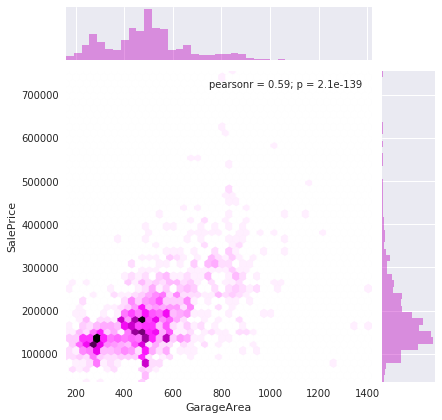

In [211]:
sns.jointplot(x="GarageArea", y="SalePrice", data=data, kind="hex", color="m")

**This is a hexbin plot and shows all the values and their overlapping occurences<br>
 It has a linear fit and thus is essential**

- Garage Quality

In [212]:
data.GarageQual.value_counts(dropna=False)

TA     1311
NaN      81
Fa       48
Gd       14
Po        3
Ex        3
Name: GarageQual, dtype: int64

** Simply not significant distributes value to take under consideration<br>
 We'll remove this feature**

- Garage Condition

In [213]:
data.GarageCond.value_counts(dropna=False)

TA     1326
NaN      81
Fa       35
Gd        9
Po        7
Ex        2
Name: GarageCond, dtype: int64

In [214]:
#same as above
data.drop(['GarageQual', 'GarageCond'], 1, inplace=True)

- Garage Unit

### Step 32
- Paved Drive

In [215]:
data.PavedDrive.value_counts(dropna=False)

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [216]:
#dropping the feature
data.drop(['PavedDrive'], 1, inplace=True)

### Step 33
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet

In [217]:
#Let's check for null values (if any)
print(data['WoodDeckSF'].isnull().sum())
print(data['OpenPorchSF'].isnull().sum())
print(data['EnclosedPorch'].isnull().sum())
print(data['3SsnPorch'].isnull().sum())
print(data['ScreenPorch'].isnull().sum())
print(data['PoolArea'].isnull().sum())

761
656
1252
1436
1344
1453


In [218]:
# we replace the null values in the first two features by their median value
data.WoodDeckSF.fillna(data.WoodDeckSF.mean(), inplace=True)
data.OpenPorchSF.fillna(data.OpenPorchSF.mean(), inplace=True)

#also we remove the remaining ones as they have mostly null values
data.drop(['EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea'], 1, inplace=True)

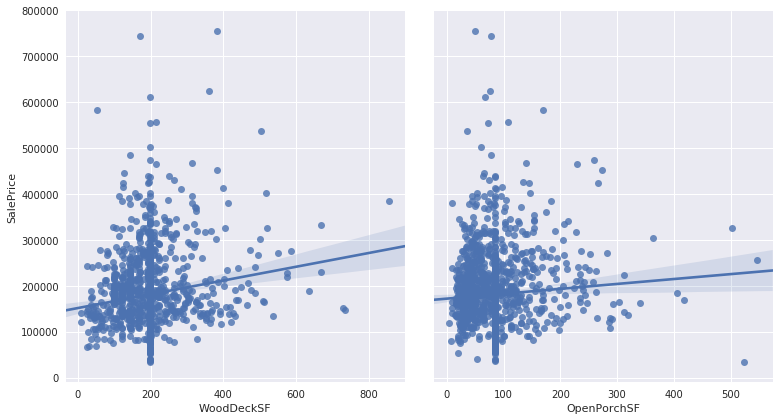

In [219]:
sns.pairplot(x_vars=['WoodDeckSF', 'OpenPorchSF'], y_vars="SalePrice", data=data, kind="reg", size=6, aspect=.9)

- Both of them doesn't provide a good linear fit to the data
- However 1st one is slightly better than the 2nd plot 
- So we'll keep the first and drop the second

In [220]:
data.drop(['OpenPorchSF'], 1, inplace=True)

### Step 34
- Month Sold
- Year Sold
- Misc Val

In [221]:
#both of these features resemble date and hence are not worth
data.drop(['MoSold', 'YrSold'], 1, inplace=True)

In [222]:
data.MiscVal.isnull().sum()

1408

In [223]:
#Clearly there is no use of this 
data.drop(['MiscVal'], 1, inplace=True)

### Step 35
- Sale Type
- Sale Coindition

In [224]:
data.SaleType.value_counts(dropna=False)

WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [225]:
# Mostly there are only waranty deed sale type and hence not much of a need of a single values
data.drop(['SaleType'], 1, inplace=True)

- Sale Condition

In [226]:
data.SaleCondition.value_counts(dropna=False)

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

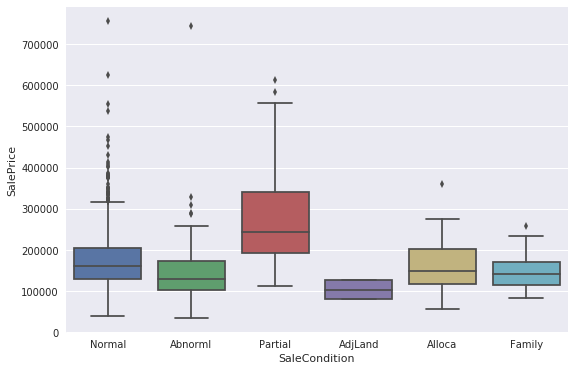

In [227]:
sns.boxplot(data.SaleCondition, data.SalePrice)

- The last 3 features shown a quite similar distribution and mean values also don't differ much
- The first 3 are different and will be grouped seperately

In [228]:
sale = {"SaleCondition" : {"Normal":1, "Abnorml":2, "Partial":3, "AdjLand":4, "Alloca":4, "Family":4}}

In [229]:
data.replace(sale, inplace=True)

In [230]:
data.SaleCondition.dtype

dtype('int64')

In [231]:
#let's have a look on our dataframe
data.head()

,MSSubClass,MSZoning,LotFrontage,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,...,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,FireplaceQu,GarageType,GarageFinish,GarageArea,WoodDeckSF,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,1,65.0,1,1,1,1,4,1,1,...,4.0,4,8,3,1,2,548.0,196.839771,1,208500
2,20,1,80.0,1,1,4,1,4,4,1,...,4.0,4,6,2,1,2,460.0,298.000000,1,181500
3,60,1,68.0,4,1,1,1,4,1,1,...,4.0,4,6,2,1,2,608.0,196.839771,1,223500
4,70,1,60.0,4,1,4,1,4,1,1,...,4.0,4,7,2,2,3,642.0,196.839771,2,140000
5,60,1,84.0,4,1,4,1,1,1,1,...,4.0,4,9,2,1,2,836.0,192.000000,1,250000


In [232]:
data.shape

(1460, 36)

In [233]:
data.dtypes

MSSubClass         int64
MSZoning           int64
LotFrontage      float64
LotShape           int64
LandContour        int64
LotConfig          int64
LandSlope          int64
Neighborhood       int64
Condition1         int64
BldgType           int64
OverallQual        int64
RoofStyle          int64
Exterior1st        int64
MasVnrType         int64
MasVnrArea       float64
ExterQual          int64
Foundation         int64
BsmtQual           int64
BsmtFinType1       int64
BsmtFinSF1       float64
TotalBsmtSF      float64
HeatingQC          int64
1stFlrSF           int64
2ndFlrSF         float64
GrLivArea          int64
FullBath         float64
BedroomAbvGr     float64
KitchenQual        int64
TotRmsAbvGrd       int64
FireplaceQu        int64
GarageType         int64
GarageFinish       int64
GarageArea       float64
WoodDeckSF       float64
SaleCondition      int64
SalePrice          int64
dtype: object

In [234]:
data.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage        0
LotShape           0
LandContour        0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
BldgType           0
OverallQual        0
RoofStyle          0
Exterior1st        0
MasVnrType         0
MasVnrArea       869
ExterQual          0
Foundation         0
BsmtQual           0
BsmtFinType1       0
BsmtFinSF1         0
TotalBsmtSF        0
HeatingQC          0
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
FullBath           0
BedroomAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
FireplaceQu        0
GarageType         0
GarageFinish       0
GarageArea         0
WoodDeckSF         0
SaleCondition      0
SalePrice          0
dtype: int64

In [235]:
data.MasVnrArea.fillna(data['MasVnrArea'].median(), inplace=True)

In [236]:
data.MasVnrArea.isnull().sum()

0

## Now we have succesfully gone through all the features and did data analysis and manipulation accordingly
**We'll now seperate our dataframe from the target varaible and then we'll proceed towards model creation**<br>
**The created model will be trained on this data**

In [237]:
#seperating the target variable
#here we are not using inplace to prevent changes in the original dataframe
X = data.drop(['SalePrice'], 1)
y = data[['SalePrice']]

### First we need to modify our test data in the same form as of our train data
- For that we need to apply each and every operation of our training data
- And also we keep only the common features from the training data

In [238]:
test = pd.read_csv('test.csv', index_col=0)
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [239]:
#first we'll drop all the features that were removed from the training data 
#creating a list
drop = ['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'Street', 'LotArea', 'Utilities', 'Condition2',
        'HouseStyle', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofMatl', 'Exterior2nd',
        'ExterCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 
        'Heating', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'LowQualFinSF', 
        'HalfBath', 'KitchenAbvGr', 'Functional', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
        'GarageQual', 'GarageCond', 'PavedDrive', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
        'ScreenPorch', 'PoolArea', 'MoSold', 'YrSold', 'MiscVal', 'SaleType']

In [240]:
len(drop)

44

In [241]:
test.drop(drop, 1, inplace=True)

In [242]:
test.shape

(1459, 35)

In [243]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,...,FullBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,FireplaceQu,GarageType,GarageFinish,GarageArea,WoodDeckSF,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,Reg,Lvl,Inside,Gtl,NAmes,Feedr,1Fam,...,1,2,TA,5,NaN,Attchd,Unf,730.0,140,Normal
1462,20,RL,81.0,IR1,Lvl,Corner,Gtl,NAmes,Norm,1Fam,...,1,3,Gd,6,NaN,Attchd,Unf,312.0,393,Normal
1463,60,RL,74.0,IR1,Lvl,Inside,Gtl,Gilbert,Norm,1Fam,...,2,3,TA,6,TA,Attchd,Fin,482.0,212,Normal
1464,60,RL,78.0,IR1,Lvl,Inside,Gtl,Gilbert,Norm,1Fam,...,2,3,Gd,7,Gd,Attchd,Fin,470.0,360,Normal
1465,120,RL,43.0,IR1,HLS,Inside,Gtl,StoneBr,Norm,TwnhsE,...,2,2,Gd,5,NaN,Attchd,RFn,506.0,0,Normal


In [244]:
test.isnull().sum()

MSSubClass         0
MSZoning           4
LotFrontage      227
LotShape           0
LandContour        0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
BldgType           0
OverallQual        0
RoofStyle          0
Exterior1st        1
MasVnrType        16
MasVnrArea        15
ExterQual          0
Foundation         0
BsmtQual          44
BsmtFinType1      42
BsmtFinSF1         1
TotalBsmtSF        1
HeatingQC          0
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
FullBath           0
BedroomAbvGr       0
KitchenQual        1
TotRmsAbvGrd       0
FireplaceQu      730
GarageType        76
GarageFinish      78
GarageArea         1
WoodDeckSF         0
SaleCondition      0
dtype: int64

- MS Zoning

In [245]:
#total no. of values of different zoning areas
test.MSZoning.value_counts(dropna=False)

RL         1114
RM          242
FV           74
C (all)      15
RH           10
NaN           4
Name: MSZoning, dtype: int64

In [246]:
test.MSZoning.fillna('RL', inplace=True)

In [247]:
#using dictionary to categorize the values
zoning = {"MSZoning" :{"RL":1, "RM":2, "FV":3, "RH":4, "C (all)":4}}

In [248]:
test.replace(zoning, inplace=True)
test.head()

,MSSubClass,MSZoning,LotFrontage,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,...,FullBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,FireplaceQu,GarageType,GarageFinish,GarageArea,WoodDeckSF,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,4,80.0,Reg,Lvl,Inside,Gtl,NAmes,Feedr,1Fam,...,1,2,TA,5,NaN,Attchd,Unf,730.0,140,Normal
1462,20,1,81.0,IR1,Lvl,Corner,Gtl,NAmes,Norm,1Fam,...,1,3,Gd,6,NaN,Attchd,Unf,312.0,393,Normal
1463,60,1,74.0,IR1,Lvl,Inside,Gtl,Gilbert,Norm,1Fam,...,2,3,TA,6,TA,Attchd,Fin,482.0,212,Normal
1464,60,1,78.0,IR1,Lvl,Inside,Gtl,Gilbert,Norm,1Fam,...,2,3,Gd,7,Gd,Attchd,Fin,470.0,360,Normal
1465,120,1,43.0,IR1,HLS,Inside,Gtl,StoneBr,Norm,TwnhsE,...,2,2,Gd,5,NaN,Attchd,RFn,506.0,0,Normal




- Lot Shape


In [249]:
test.LotShape.value_counts(dropna=False)

Reg    934
IR1    484
IR2     35
IR3      6
Name: LotShape, dtype: int64

In [250]:
lot = {"LotShape" : {"Reg":1, "IR1":2, "IR3":3, "IR2":3}}

In [251]:
test.replace(lot, inplace=True)

- Land Contour

In [252]:
test.LandContour.value_counts(dropna=False)

Lvl    1311
HLS      70
Bnk      54
Low      24
Name: LandContour, dtype: int64

In [253]:
contour = {"LandContour" : {"Lvl":1, "Bnk":3, "Low":2, "HLS":2}}

In [254]:
test.replace(contour, inplace=True)

- LotFrontage

In [255]:
#let's check if it contains any null values 
test.LotFrontage.isnull().sum()

227

In [256]:
#we are now filling the null values with the median value
test.LotFrontage.fillna(test.LotFrontage.median(), inplace=True)

In [257]:
#Let's verify
test.LotFrontage.isnull().sum()

0

- Lot Configuration

In [258]:
test.LotConfig.value_counts(dropna=False)

Inside     1081
Corner      248
CulDSac      82
FR2          38
FR3          10
Name: LotConfig, dtype: int64

In [259]:
#Let make it numeric
config = {"LotConfig" : {"Inside":1, "Corner":2, "CulDSac":3, "FR2":4, "FR3":4}}

In [260]:
test.replace(config, inplace=True)

- Land Slope

In [261]:
test.LandSlope.value_counts(dropna=False)

Gtl    1396
Mod      60
Sev       3
Name: LandSlope, dtype: int64

In [262]:
slope = {"LandSlope" : {"Gtl":1, "Mod":2, "Sev":3}}

In [263]:
test.replace(slope, inplace=True)

- Neighbourhood

In [264]:
test.Neighborhood.value_counts(dropna=False)

NAmes      218
OldTown    126
CollgCr    117
Somerst     96
Edwards     94
NridgHt     89
Gilbert     86
Sawyer      77
SawyerW     66
Mitchel     65
NWAmes      58
IDOTRR      56
Crawfor     52
BrkSide     50
Timber      34
NoRidge     30
StoneBr     26
SWISU       23
MeadowV     20
ClearCr     16
BrDale      14
NPkVill     14
Veenker     13
Blmngtn     11
Blueste      8
Name: Neighborhood, dtype: int64

In [265]:
neigh = {"Neighborhood" : {"NoRidge":1, "NridgHt":1, "StoneBr":1, "NAmes":2, "CollgCr":2,
                           "OldTown":2, "Edwards":2 , "Somerst":3, "Gilbert":3, "NWAmes":3,
                           "SawyerW":3, "Crawfor":3, "Veenker":3, "Timber":3, "ClearCr":3, 
                           "Blmngtn":3, "Blueste":4, "SWISU":4, "BrDale":4, "NPkVill":4, 
                           "MeadowV":4, "IDOTRR":4, "Sawyer":4, "BrkSide":4, "Mitchel":3,}}

In [266]:
test.replace(neigh, inplace=True)

- Condition 1

In [267]:
test.Condition1.value_counts(dropna=False)

Norm      1251
Feedr       83
Artery      44
RRAn        24
PosN        20
RRAe        17
PosA        12
RRNe         4
RRNn         4
Name: Condition1, dtype: int64

In [268]:
cond = {"Condition1" : {"Norm":1, "RRAn":1, "Feedr":2, "Artery":2, "RRAe":2,
                       "RRNn":3, "PosN":3, "PosA":3, "RRNe":3 }}

In [269]:
test.replace(cond, inplace=True)

- BldgType

In [270]:
test.BldgType.value_counts(dropna=False)

1Fam      1205
TwnhsE     113
Duplex      57
Twnhs       53
2fmCon      31
Name: BldgType, dtype: int64

In [271]:
bltype = {"BldgType" : {"1Fam":1, "TwnhsE":2, "2fmCon":3, "Duplex":3, "Twnhs":3}}

In [272]:
test.replace(bltype, inplace=True)

In [273]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,...,FullBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,FireplaceQu,GarageType,GarageFinish,GarageArea,WoodDeckSF,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,4,80.0,1,1,1,1,2,2,1,...,1,2,TA,5,NaN,Attchd,Unf,730.0,140,Normal
1462,20,1,81.0,2,1,2,1,2,1,1,...,1,3,Gd,6,NaN,Attchd,Unf,312.0,393,Normal
1463,60,1,74.0,2,1,1,1,3,1,1,...,2,3,TA,6,TA,Attchd,Fin,482.0,212,Normal
1464,60,1,78.0,2,1,1,1,3,1,1,...,2,3,Gd,7,Gd,Attchd,Fin,470.0,360,Normal
1465,120,1,43.0,2,2,1,1,1,1,2,...,2,2,Gd,5,NaN,Attchd,RFn,506.0,0,Normal


- Overall quality 

In [274]:
test.OverallQual.value_counts(dropna=False)

5     428
6     357
7     281
8     174
4     110
9      64
3      20
10     13
2      10
1       2
Name: OverallQual, dtype: int64

- Roof Style

In [275]:
test.RoofStyle.value_counts(dropna=False)

Gable      1169
Hip         265
Gambrel      11
Flat          7
Mansard       4
Shed          3
Name: RoofStyle, dtype: int64

In [276]:
# categorizing the feature
roof = {"RoofStyle" : {"Gable":1, "Hip":2, "Mansard":2, "Flat":2, "Gambrel":3, "Shed":3}}

In [277]:
test.replace(roof, inplace=True)

- exterior 1

In [278]:
test.Exterior1st.value_counts(dropna=False)

VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
CBlock       1
AsphShn      1
NaN          1
Name: Exterior1st, dtype: int64

In [279]:
test.Exterior1st.fillna('VinylSd', inplace=True)

In [280]:
ext = {"Exterior1st" : {"VinylSd":1, "BrkFace":1, "MetalSd":2, "HdBoard":2, "Wd Sdng":2,
                        "Plywood":2, "Stucco":2, "WdShing":3, "AsbShng":3, "AsphShn":3,
                        "CBlock":3, "BrkComm":3, "CemntBd":4, "Stone":4, "ImStucc":4}}

In [281]:
test.replace(ext, inplace=True)

- Masonary Vineer Type

In [282]:
#dropna also shows the value count of the null values (if any)
test.MasVnrType.value_counts(dropna=False)

None       878
BrkFace    434
Stone      121
NaN         16
BrkCmn      10
Name: MasVnrType, dtype: int64

In [283]:
#replacing none values
test.MasVnrType.replace('None', 'Stone', inplace=True)

In [284]:
#let's test it
test.MasVnrType.value_counts(dropna=False)

Stone      999
BrkFace    434
NaN         16
BrkCmn      10
Name: MasVnrType, dtype: int64

In [285]:
test.MasVnrType.isnull().sum()

16

In [286]:
test['MasVnrType'].fillna('Stone', inplace=True)

In [287]:
test.MasVnrType.isnull().sum()

0

In [288]:
#Now we just categorize the parameteres
mas = {"MasVnrType" : {"Stone":1, "BrkFace":2, "BrkCmn":2}}
test.replace(mas, inplace=True)

- Masonary venner area

In [289]:
test.MasVnrArea.isnull().sum()

15

In [290]:
test['MasVnrArea'].fillna(test['MasVnrArea'].median(), inplace=True)

In [291]:
test.MasVnrArea.isnull().sum()

0

- Exterior quality 

In [292]:
test.ExterQual.value_counts(dropna=False)

TA    892
Gd    491
Ex     55
Fa     21
Name: ExterQual, dtype: int64

In [293]:
qual = {"ExterQual" :{"Gd":2, "Ex":2, "TA":1, "Fa":1}}

In [294]:
test.replace(qual, inplace=True)


- Foundation

In [295]:
test.Foundation.value_counts()

PConc     661
CBlock    601
BrkTil    165
Slab       25
Stone       5
Wood        2
Name: Foundation, dtype: int64

In [296]:
found = {"Foundation" : {"PConc":1, "Wood":1, "CBlock":2, "Slab":2, "BrkTil":3, "Stone":3 }}

In [297]:
test.replace(found, inplace=True)

- Basement Quality
- Basement Finished Area Rating type 1


In [298]:
test.BsmtQual.value_counts(dropna=False)

TA     634
Gd     591
Ex     137
Fa      53
NaN     44
Name: BsmtQual, dtype: int64

In [299]:
test.BsmtQual.fillna('Gd', inplace=True)

In [300]:
test.BsmtQual.isnull().sum()

0

In [301]:
test.BsmtQual.unique()

array(['TA', 'Gd', 'Ex', 'Fa'], dtype=object)

In [302]:
base = {"BsmtQual" : {"Gd":1, "TA":2, "Ex":3, "Fa":2}}

In [303]:
test.replace(base, inplace=True)

In [304]:
#As we know 0.0 constitute null values so, we replace it by nan
test.replace(0.0, np.nan, inplace=True)

- BsmtFinType1

In [305]:
test.BsmtFinType1.value_counts(dropna=False)

GLQ    431
Unf    421
ALQ    209
Rec    155
BLQ    121
LwQ     80
NaN     42
Name: BsmtFinType1, dtype: int64

In [306]:
#filling up the null values
test.BsmtFinType1.replace(np.nan, "Unf", inplace=True)

In [307]:
test.BsmtFinType1.value_counts(dropna=False)

Unf    463
GLQ    431
ALQ    209
Rec    155
BLQ    121
LwQ     80
Name: BsmtFinType1, dtype: int64

In [308]:
fin1 = {"BsmtFinType1" : {"GLQ":1, "Unf":2, "ALQ":3, "Rec":3, "BLQ":3, "LwQ":3}}

In [309]:
test.replace(fin1, inplace=True)

- Basement Finished Area Square feet type1
- Total square feet basement area

**At First we check any null values ,if present we replace them accordingly**

In [310]:
print(test.BsmtFinSF1.isnull().sum())
print(test.TotalBsmtSF.isnull().sum())

463
42


In [311]:
# filling the null values with the median values of each column
test.BsmtFinSF1.fillna(test.BsmtFinSF1.median(), inplace=True)

In [312]:
test.TotalBsmtSF.fillna(test.TotalBsmtSF.median(), inplace=True)

In [313]:
test.TotalBsmtSF.isnull().sum()

0

- HeatingQC

In [314]:
test.HeatingQC.value_counts(dropna=False)

Ex    752
TA    429
Gd    233
Fa     43
Po      2
Name: HeatingQC, dtype: int64

In [315]:
heat = {"HeatingQC" : {"Ex":1, "Gd":2, "TA":2, "Fa":3, "Po":3}}

In [316]:
test.replace(heat, inplace=True)

- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- GrLivArea: Above grade (ground) living area square feet

In [317]:
#checking for null values
print(test['1stFlrSF'].isnull().sum())
print(test['2ndFlrSF'].isnull().sum())
print(test['GrLivArea'].isnull().sum())

0
839
0


In [318]:
#filling null in 2nd floor area
test['2ndFlrSF'].fillna(test['2ndFlrSF'].mean(), inplace=True)

- FullBath: Full bathrooms above grade
- Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

In [319]:
print(test.FullBath.isnull().sum())
print(test.BedroomAbvGr.isnull().sum())

3
2


- FullBath

In [320]:
test.FullBath.value_counts(dropna=False)

 2.0    762
 1.0    659
 3.0     31
 4.0      4
NaN       3
Name: FullBath, dtype: int64

In [321]:
# we replace the null values to the no.2 as it is has most values
test.FullBath.fillna(2, inplace=True)

In [322]:
test.FullBath.value_counts(dropna=False)

2.0    765
1.0    659
3.0     31
4.0      4
Name: FullBath, dtype: int64

- BedroomAbvGr

In [323]:
test.BedroomAbvGr.value_counts(dropna=False)

 3.0    792
 2.0    384
 4.0    187
 1.0     53
 5.0     27
 6.0     14
NaN       2
Name: BedroomAbvGr, dtype: int64

In [324]:
test.BedroomAbvGr.replace([8, 6, np.nan], 5, inplace=True)

In [325]:
#let's check it 
test.BedroomAbvGr.value_counts(dropna=False)

3.0    792
2.0    384
4.0    187
1.0     53
5.0     43
Name: BedroomAbvGr, dtype: int64

- Kitchen Quality

In [326]:
test.KitchenQual.value_counts(dropna=False)

TA     757
Gd     565
Ex     105
Fa      31
NaN      1
Name: KitchenQual, dtype: int64

In [327]:
test.KitchenQual.fillna('Ex', inplace=True)

In [328]:
kitchen = {"KitchenQual" : {"Ex":1, "Gd":2, "TA":3, "Fa":3}}

In [329]:
test.replace(kitchen, inplace=True)

- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)


In [330]:
test.TotRmsAbvGrd.value_counts(dropna=False)

6     442
7     320
5     308
8     160
4      99
9      68
10     33
11     14
3       8
12      5
15      1
13      1
Name: TotRmsAbvGrd, dtype: int64

In [331]:
#let's reduce the categorical values if can be done
test.replace([2, 3], 4, inplace=True)
test.replace([10, 11, 12, 14], 9, inplace=True)

In [332]:
test.TotRmsAbvGrd.value_counts(dropna=False)

6     442
7     320
5     308
8     160
9     120
4     107
15      1
13      1
Name: TotRmsAbvGrd, dtype: int64

- FireplaceQu

In [333]:
test.FireplaceQu.value_counts(dropna=False)

NaN    730
Gd     364
TA     279
Fa      41
Po      26
Ex      19
Name: FireplaceQu, dtype: int64

In [334]:
test.FireplaceQu.fillna("Fa", inplace=True)

In [335]:
test.FireplaceQu.value_counts(dropna=False)

Fa    771
Gd    364
TA    279
Po     26
Ex     19
Name: FireplaceQu, dtype: int64

In [336]:
fire = {"FireplaceQu" : {"Ex":1, "Gd":2, "TA":2, "Fa":3, "Po":3}}

In [337]:
test.replace(fire, inplace=True)


- GarageType: Garage location
- GarageFinish: Interior finish of the garage
- GarageArea: Size of garage in square feet


In [338]:
test.GarageType.value_counts(dropna=False)

Attchd     853
Detchd     392
BuiltIn     98
NaN         76
Basment     17
2Types      17
CarPort      6
Name: GarageType, dtype: int64

In [339]:
#replacing the null values
test.GarageType.fillna("Attchd", inplace=True)

In [340]:
gtype = {"GarageType" : {"Attchd":1, "Detchd":2, "BuiltIn":3, "CarPort":4, "Basment":4, "2Types":4}}

In [341]:
test.replace(gtype, inplace=True)

- Garage Finished

In [342]:
test.GarageFinish.value_counts(dropna=False)

Unf    625
RFn    389
Fin    367
NaN     78
Name: GarageFinish, dtype: int64

In [343]:
#unfinished and nan (no garage) provide the same meaning and hence can be replaced with that
test.GarageFinish.fillna("Unf", inplace=True)

In [344]:
finish = {"GarageFinish" : {"RFn":2, "Fin":1, "Unf":3}}

In [345]:
test.replace(finish, inplace=True)

- Garage Area

In [346]:
test.GarageArea.isnull().sum()

77

In [347]:
test.GarageArea.fillna(test.GarageArea.median(), inplace=True)

In [348]:
test.GarageArea.isnull().sum()

0

- WoodDeckSF: Wood deck area in square feet


In [349]:
#Let's check for null values (if any)
print(test['WoodDeckSF'].isnull().sum())

762


In [350]:
# we replace the null values in the first two features by their median value
test.WoodDeckSF.fillna(test.WoodDeckSF.mean(), inplace=True)

- Sale Condition

In [351]:
test.SaleCondition.value_counts(dropna=False)

Normal     1204
Partial     120
Abnorml      89
Family       26
Alloca       12
AdjLand       8
Name: SaleCondition, dtype: int64

In [352]:
sale = {"SaleCondition" : {"Normal":1, "Abnorml":2, "Partial":3, "AdjLand":4, "Alloca":4, "Family":4}}

In [353]:
test.replace(sale, inplace=True)

       Let's check the testing dataset as if the manipulations are proper or not

In [354]:
test.dtypes

MSSubClass         int64
MSZoning           int64
LotFrontage      float64
LotShape           int64
LandContour        int64
LotConfig          int64
LandSlope          int64
Neighborhood       int64
Condition1         int64
BldgType           int64
OverallQual        int64
RoofStyle          int64
Exterior1st        int64
MasVnrType         int64
MasVnrArea       float64
ExterQual          int64
Foundation         int64
BsmtQual           int64
BsmtFinType1       int64
BsmtFinSF1       float64
TotalBsmtSF      float64
HeatingQC          int64
1stFlrSF           int64
2ndFlrSF         float64
GrLivArea          int64
FullBath         float64
BedroomAbvGr     float64
KitchenQual        int64
TotRmsAbvGrd       int64
FireplaceQu        int64
GarageType         int64
GarageFinish       int64
GarageArea       float64
WoodDeckSF       float64
SaleCondition      int64
dtype: object

In [355]:
test.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage        0
LotShape           0
LandContour        0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
BldgType           0
OverallQual        0
RoofStyle          0
Exterior1st        0
MasVnrType         0
MasVnrArea       892
ExterQual          0
Foundation         0
BsmtQual           0
BsmtFinType1       0
BsmtFinSF1         0
TotalBsmtSF        0
HeatingQC          0
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
FullBath           0
BedroomAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
FireplaceQu        0
GarageType         0
GarageFinish       0
GarageArea         0
WoodDeckSF         0
SaleCondition      0
dtype: int64

In [356]:
test.MasVnrArea.fillna(test['MasVnrArea'].median(), inplace=True)

In [357]:
test.MasVnrArea.isnull().sum()

0

In [358]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,...,FullBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,FireplaceQu,GarageType,GarageFinish,GarageArea,WoodDeckSF,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,4,80.0,1,1,1,1,4,4,1,...,1.0,4.0,4,5,3,1,3,730.0,140.000000,1
1462,20,1,81.0,4,1,4,1,4,1,1,...,1.0,4.0,4,6,3,1,3,312.0,393.000000,1
1463,60,1,74.0,4,1,1,1,4,1,1,...,4.0,4.0,4,6,2,1,1,482.0,212.000000,1
1464,60,1,78.0,4,1,1,1,4,1,1,...,4.0,4.0,4,7,2,1,1,470.0,360.000000,1
1465,120,1,43.0,4,4,1,1,1,1,4,...,4.0,4.0,4,5,3,1,2,506.0,195.031564,1


In [359]:
test.shape

(1459, 35)

In [360]:
#This is our traning data matrix
X.shape

(1460, 35)

In [361]:
#This is our target varaible of the train file
y.shape

(1460, 1)

### Now we'll implement regrssion algorithms on our training and testing datset

- Linear Regression

In [362]:
#importing the Linear Regression algorithm
from sklearn.linear_model import LinearRegression

In [363]:
#instantiating our linear model named Lreg
Lreg = LinearRegression()

In [364]:
#Fitting our model to the training data
Lreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [365]:
#Let;s check the accuracy of our model on our training data
Lreg.score(X, y)

0.8357922712708252

In [366]:
#now we'll make our model to perform predictions on the test data
predictions = Lreg.predict(test)

**Now we'll submit our predictions into a new csv file**

In [392]:
result = pd.DataFrame(test.index, columns=['Id'])

In [393]:
result['SalePrice'] = predictions

In [394]:
result.shape

(1459, 2)

In [395]:
result.head()

,Id,SalePrice
0,1461,102087.205231
1,1462,161647.180930
2,1463,176820.959467
3,1464,197697.612023
4,1465,213781.022168


In [396]:
type(result)

pandas.core.frame.DataFrame

In [406]:
#converting the dataframe to csv file
result.to_csv('sale.csv', index=False)

In [407]:
type(result)

pandas.core.frame.DataFrame

In [408]:
tell = pd.read_csv('sale')

In [409]:
tell.head()

,Id,SalePrice
0,1461,102087.205231
1,1462,161647.180930
2,1463,176820.959467
3,1464,197697.612023
4,1465,213781.022168
